# Loading the dataset and do  EDA for visualization

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('healthcare.csv')

In [46]:
df.dtypes

Patient ID           int64
Name                   str
Age                  int64
Gender                 str
Address                str
Date                   str
Time                   str
Affected_Disease       str
Consulting Doctor      str
dtype: object

In [47]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Patient ID         6298 non-null   int64
 1   Name               6298 non-null   str  
 2   Age                6298 non-null   int64
 3   Gender             6298 non-null   str  
 4   Address            6298 non-null   str  
 5   Date               6298 non-null   str  
 6   Time               6298 non-null   str  
 7   Affected_Disease   6298 non-null   str  
 8   Consulting Doctor  6298 non-null   str  
dtypes: int64(2), str(7)
memory usage: 1.0 MB


In [48]:
df.shape

(6298, 9)

In [49]:
df.head()

,Patient ID,Name,Age,Gender,Address,Date,Time,Affected_Disease,Consulting Doctor
0,1,Jessica Thompson,49,Male,"17772 Schaefer Ways Suite 436, Briannaview, WI...",07-09-2023,13:03:17,Flu,Dr. Patel
1,2,Erica Bishop,6,Male,"84461 Bonilla Stream, Christopherland, DC 23053",21-02-2023,10:08:00,Heart Disease,Dr. Johnson
2,3,Cynthia Jackson,27,Male,"558 Steven Keys Suite 277, West John, VA 60775",16-01-2023,06:00:10,Allergy,Dr. Hughes
3,4,Erin Lee,50,Female,"767 Christopher Expressway Suite 837, New Stev...",27-03-2022,18:06:49,Diabetes,Dr. Turner
4,5,Cheryl Hull,90,Female,"951 Tyler Mountain Suite 883, Lake Joshuamouth...",01-12-2020,19:03:37,Heart Disease,Dr. Patel


In [50]:
df.tail()

,Patient ID,Name,Age,Gender,Address,Date,Time,Affected_Disease,Consulting Doctor
6293,6294,Justin Cook,77,Female,"27997 Samuel Lights, Scottfurt, AL 83954",13-04-2021,10:39:34,Diabetes,Dr. Johnson
6294,6295,Alyssa Russell,28,Male,"6107 Nicholas River Apt. 027, South Candaceche...",30-06-2022,14:38:07,Asthma,Dr. Hughes
6295,6296,Taylor Perez,95,Male,"Unit 0993 Box 4051, DPO AE 30209",26-01-2023,11:41:54,Allergy,Dr. Johnson
6296,6297,Chase Lambert,30,Female,"3643 Obrien Course, Deborahhaven, VT 85219",23-02-2020,09:05:07,Covid-19,Dr. Smith
6297,6298,Kelly Berry,79,Female,"23850 Morse Walks Suite 220, Weaverview, IA 75406",17-06-2021,04:49:56,Migraine,Dr. Hughes


In [51]:
df.isnull().sum()

Patient ID           0
Name                 0
Age                  0
Gender               0
Address              0
Date                 0
Time                 0
Affected_Disease     0
Consulting Doctor    0
dtype: int64

In [52]:
df.duplicated().sum()

np.int64(0)

# Basic conversions of  feature engineering 


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Data Visualizations

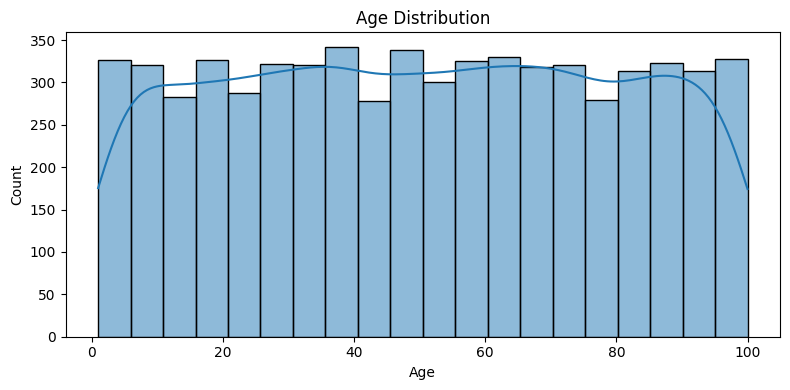

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

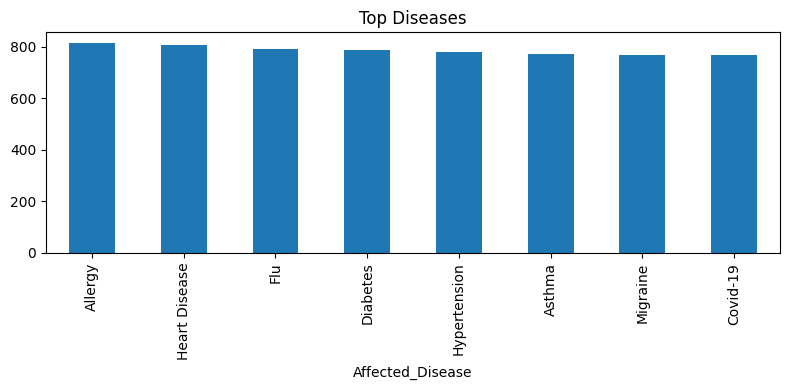

In [9]:
plt.figure(figsize=(8,4))
df['Affected_Disease'].value_counts().head(10).plot(kind='bar')
plt.title('Top Diseases')
plt.tight_layout()
plt.show()

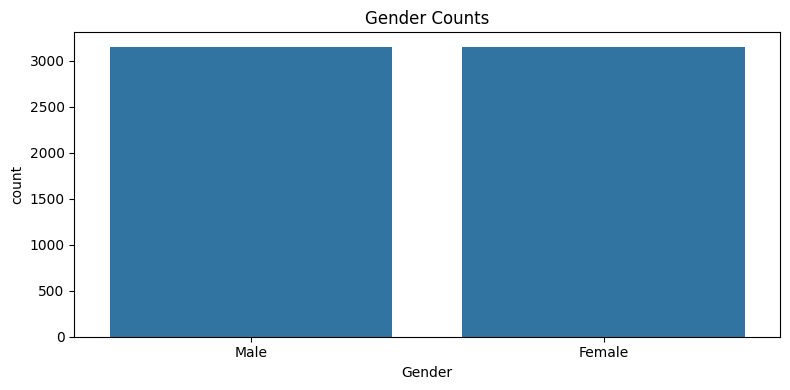

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data = df, x='Gender')
plt.title('Gender Counts')
plt.tight_layout()
plt.show()


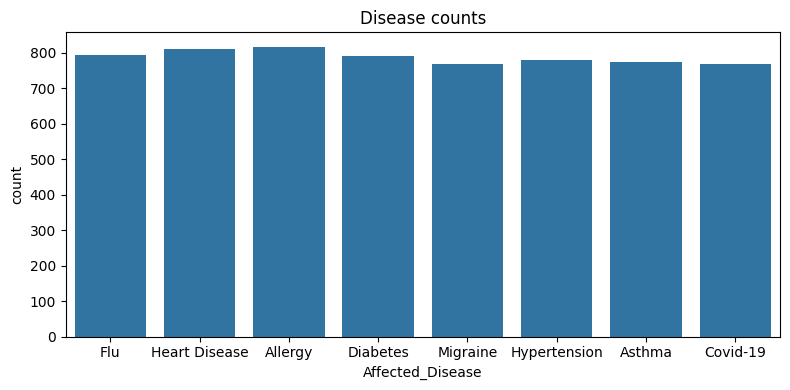

In [56]:
plt.figure(figsize=(8,4))
sns.countplot(data = df, x='Affected_Disease')
plt.title('Disease counts')
plt.tight_layout()
plt.show()

# Appling MLMODEL for future predection

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay

# Copy dataset

ml_df = df.copy()

feature_cols = [
    'Age',
    'Gender',
    'Consulting Doctor'
]

target_col = 'Affected_Disease'

ml_df = ml_df.dropna(subset=feature_cols + [target_col])

X = ml_df[feature_cols]
y = ml_df[target_col]

# Manual Encoding (IMPORTANT)
X_encoded = pd.get_dummies(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
)

# Model
model = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    class_weight='balanced_subsample'
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_pred 

array(['Allergy', 'Flu', 'Asthma', ..., 'Diabetes', 'Diabetes',
       'Covid-19'], shape=(1260,), dtype=object)

# Evaluate the model

In [60]:

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.12698412698412698


In [61]:
print("classification_report:",classification_report(y_test, y_pred))


classification_report:                precision    recall  f1-score   support

      Allergy       0.13      0.10      0.11       166
       Asthma       0.12      0.14      0.13       145
     Covid-19       0.16      0.16      0.16       156
     Diabetes       0.15      0.16      0.15       158
          Flu       0.15      0.13      0.14       173
Heart Disease       0.09      0.08      0.08       167
 Hypertension       0.11      0.13      0.12       157
     Migraine       0.11      0.12      0.12       138

     accuracy                           0.13      1260
    macro avg       0.13      0.13      0.13      1260
 weighted avg       0.13      0.13      0.13      1260



In [73]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17, 19, 22, 21, 28, 21, 22, 16],
       [18, 20, 10, 20, 15, 26, 15, 21],
       [14, 15, 25, 25, 11, 21, 23, 22],
       [18, 27, 16, 25, 21,  8, 23, 20],
       [26, 22, 21, 18, 22, 21, 25, 18],
       [ 9, 21, 24, 20, 20, 13, 38, 22],
       [21, 17, 23, 23, 22, 15, 21, 15],
       [11, 19, 15, 16, 12, 23, 25, 17]])

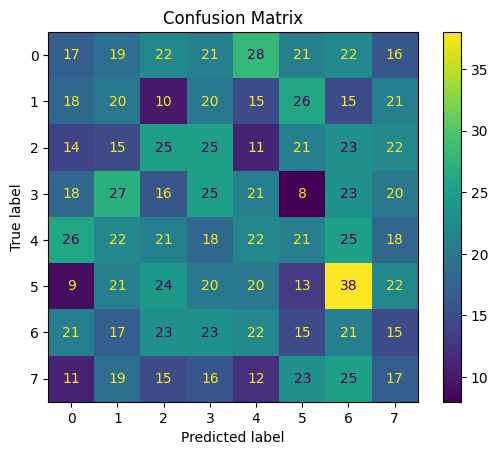

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [74]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

print(comparison_df.head(10))


          Actual      Predicted
0       Migraine        Allergy
1        Allergy            Flu
2   Hypertension         Asthma
3       Diabetes        Allergy
4  Heart Disease   Hypertension
5       Diabetes  Heart Disease
6   Hypertension   Hypertension
7       Migraine         Asthma
8        Allergy        Allergy
9       Diabetes       Migraine


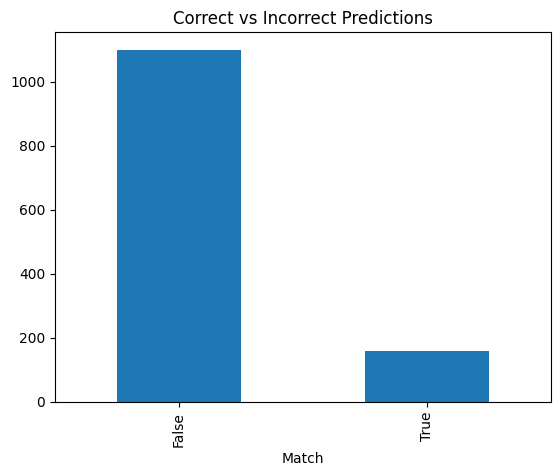

In [75]:
comparison_df["Match"] = comparison_df["Actual"] == comparison_df["Predicted"]

comparison_df["Match"].value_counts().plot(kind="bar")

plt.title("Correct vs Incorrect Predictions")
plt.show()


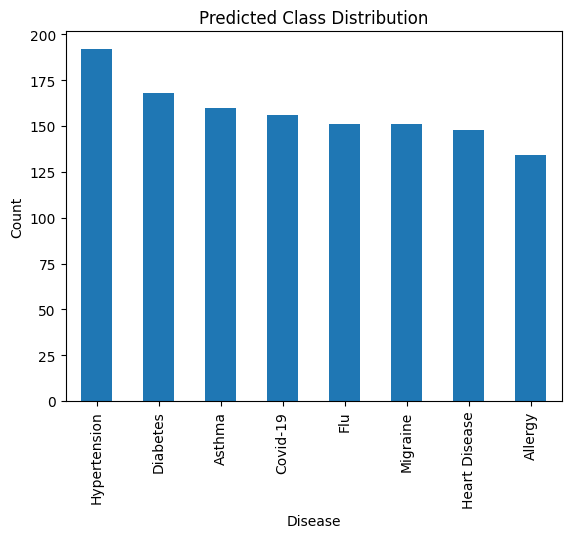

In [76]:
pd.Series(y_pred).value_counts().plot(kind="bar")

plt.title("Predicted Class Distribution")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.show()


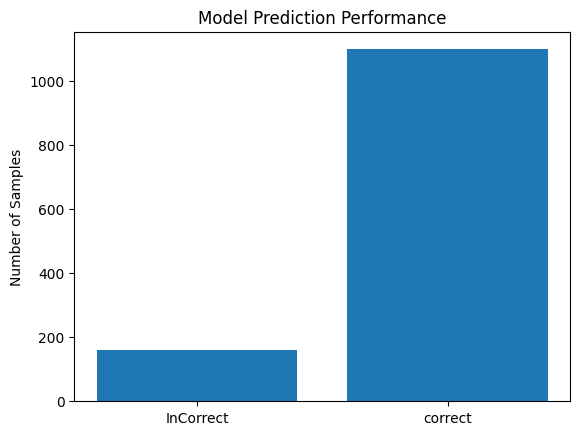

In [78]:
correct = (y_test == y_pred).sum()
incorrect = (y_test != y_pred).sum()

plt.bar(["InCorrect", "correct"], [correct, incorrect])
plt.title("Model Prediction Performance")
plt.ylabel("Number of Samples")
plt.show()


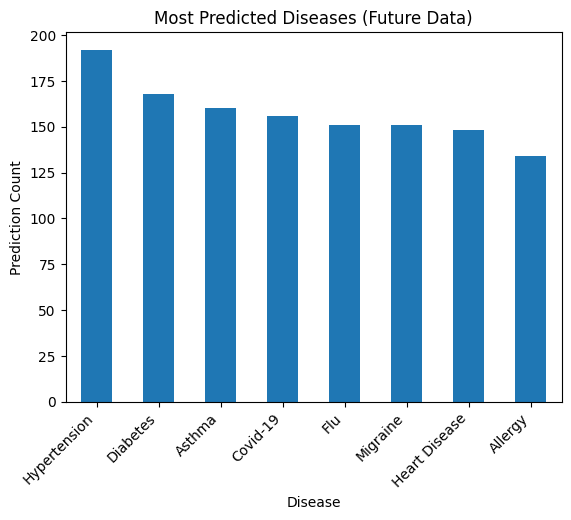

In [80]:


pd.Series(y_pred).value_counts().head(10).plot(kind='bar')

plt.title("Most Predicted Diseases (Future Data)")
plt.xlabel("Disease")
plt.ylabel("Prediction Count")
plt.xticks(rotation=45, ha='right')
plt.show()


Built a machine learning model to predict affected diseases from healthcare data.

Used patient demographics, consulting doctor, and time-related features as inputs.

Applied categorical encoding and trained a Random Forest Classifier.

Evaluated model performance using accuracy and classification metrics.

Generated future predictions and visualized the most predicted diseases.